In [2]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pandas as pd
from scipy.stats import chi2
from IPython.display import Latex

In [3]:
#Path of excell file
path = '/home/peppo/Documents/Labo_cal/Labex/C/data.xlsx'

<h1>Data

In [4]:
data_frame = pd.read_excel(path)

spazio = data_frame['spazio'].to_numpy()
tempo = data_frame['tempo'].to_numpy()

print(data_frame)

   spazio         tempo   velocità
0     2.0  6.666667e-09  300000000
1     2.5  8.333333e-09  300000000
2     3.0  1.000000e-08  300000000
3     3.5  1.166667e-08  300000000
4     4.0  1.333333e-08  300000000


<h4>Sigmas

In [5]:
tempi_err = 1e-10       #penso sia la sensibilità dell' oscilloscopio
spazi_err = 1e-2        #boh ho messo un centimetro dato che non sanno leggere il metro i bimbi

tempi_errs = tempi_err*np.ones(len(tempo))
spazi_errs = spazi_err*np.ones(len(spazio))

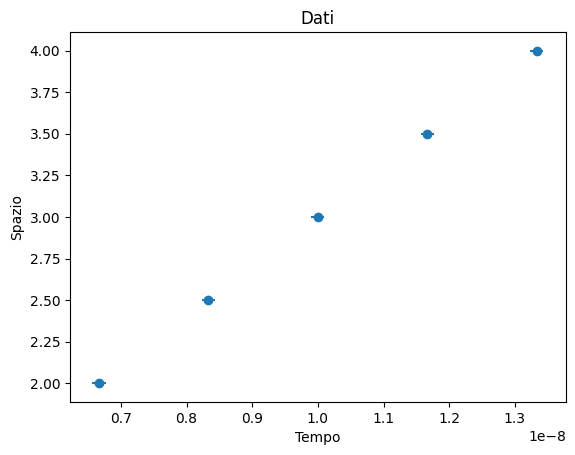

In [11]:
plt.scatter(tempo,spazio)
plt.errorbar(tempo,spazio,xerr=tempi_errs,yerr=spazi_errs,linestyle='None')
plt.title("Dati")
plt.xlabel("Tempo")
plt.ylabel("Spazio")
plt.show()

<h1>Fitting

In [7]:
def linear(x,m,q):
    return m*x+q

In [8]:
dataFit = LeastSquares(tempo,spazio,spazi_err,linear)

my_minuit = Minuit(dataFit,m=0,q=0)
my_minuit.migrad()
my_minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.157e-05 (χ²/ndof = 0.0)  │              Nfcn = 54               │
│ EDM = 7.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │  300.0e6  │   1.9e6   │            │            │         │         │       │
│ 1 │ q    │   -0.00   │   0.02    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             m             q │
├───┼─────────────────────────────┤
│ m │       3.6e+12 -36.0000037e3 │
│ q │ -36.0000037e3       0.00038 │
└───┴─────────────────────────────┘

In [9]:
esitmated_c = round(my_minuit.values[0])

Latex(f"$$\\text{{Estimated C value:\t}}  {{{esitmated_c}}}$$")

<IPython.core.display.Latex object>

<h1>Quality of the fit

In [10]:
chi_squared = my_minuit.fval
degrees_freedom = my_minuit.ndof

#probabilità di avere un buon fit (credo, idk)
p = 1. - chi2.cdf(chi_squared,degrees_freedom)

Latex(f"$$ \\chi^2 = {{{chi_squared}}} \\newline d = {{{degrees_freedom}}} \\newline p = {{{p*100}}}$$")

<IPython.core.display.Latex object>